Fraud Detection

---



In [111]:
# Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

```
# ================================
# Load and Inspect Dataset
# ================================
```

In [112]:
# loading the dataset
df = pd.read_csv('/content/Fraud_Analysis_Dataset.csv')

In [113]:
df.shape

(11142, 10)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [115]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


```
# ================================
# Exploratory Data Analysis (EDA)
# ================================
```

In [116]:
# Check for Null values
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [117]:
# gives the correlation for "isFraud" column
correlation = df.corr(numeric_only=True)
print(correlation["isFraud"])
# Findings = step has strong correlation and amount have moderate correlation
 #(Strength between two variables)

step              0.831961
amount            0.435490
oldbalanceOrg     0.046445
newbalanceOrig   -0.127912
oldbalanceDest   -0.056575
newbalanceDest   -0.002864
isFraud           1.000000
Name: isFraud, dtype: float64


In [118]:
df = df.drop(columns=['oldbalanceDest', 'newbalanceDest'])

In [119]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,1


In [120]:
# Exploring the Transaction count
df.type.value_counts()

,count
type,
PAYMENT,5510
CASH_IN,1951
CASH_OUT,1871
TRANSFER,1464
DEBIT,346


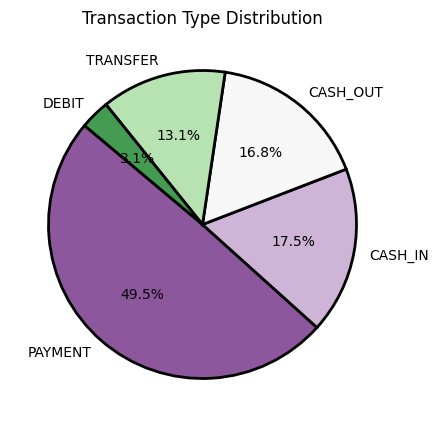

In [121]:
# Count occurrences of each transaction type and Plot the Pie Chart
type_counts = df["type"].value_counts()
colors = sns.color_palette("PRGn", len(type_counts))
plt.figure(figsize=(8, 5))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140,
        colors=colors, wedgeprops={'edgecolor': 'black','linewidth': 2})

plt.title('Transaction Type Distribution')
plt.show()
# Findings = Payment is the mostused transaction type

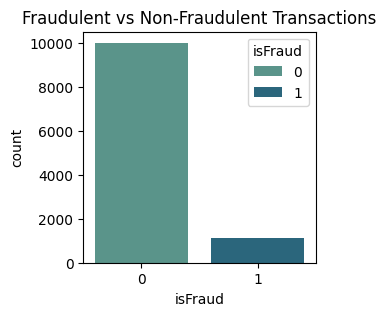

In [122]:
# Countplot of Fraudulent vs Non-Fraudulent Transactions
plt.figure(figsize=(3, 3))
colors = sns.color_palette("crest", 2)
sns.countplot(x=df['isFraud'],hue=df['isFraud'], palette=colors)
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.show()

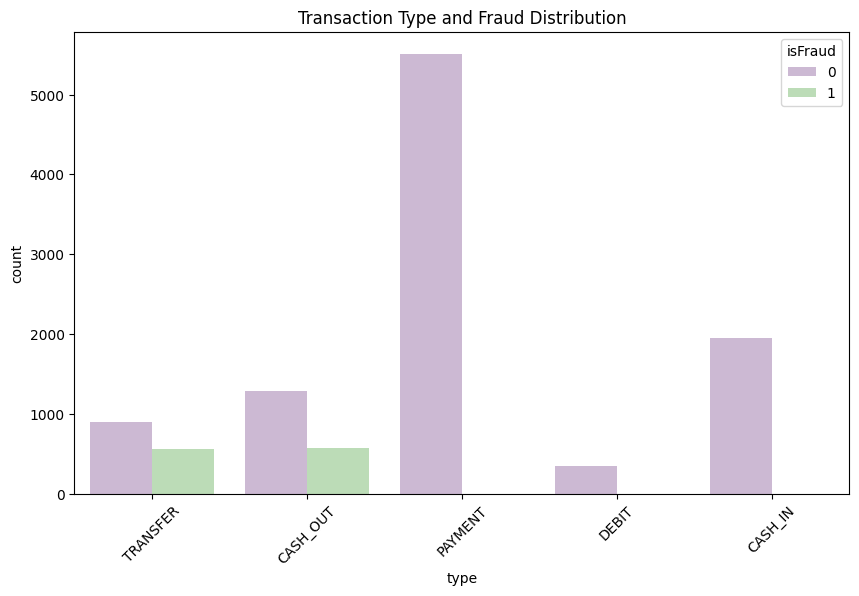

In [123]:
# Countplot of Transaction Type with Fraud Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=df['type'], hue=df['isFraud'], palette='PRGn')
plt.title('Transaction Type and Fraud Distribution')
plt.xticks(rotation=45)
plt.show()
# Findings = Transfer and cashout is having Fraud transaction

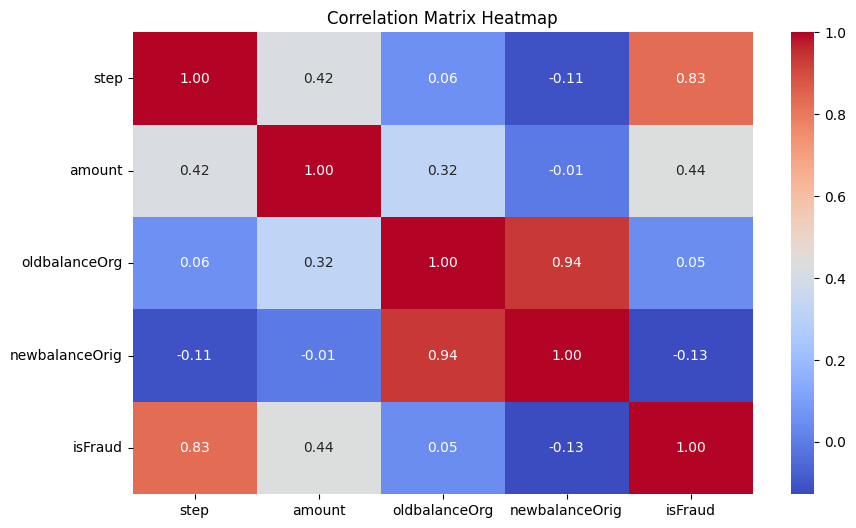

In [124]:
# To find the correlation between the isFraud column and other numerical columns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [125]:
# Encoding (Converting Text to Numbers)
encoder = LabelEncoder()
df["type_encoded"] = encoder.fit_transform(df["type"])
# Done this to assign an numerical value to the categorical value

In [126]:
# This code shows the type along with its encoded values
df.groupby("type")["type_encoded"].first().reset_index()
# or you can use
# df.groupby("type")["type_encoded"].unique() - THIS SHOWS THE UNIQUE VALUES WHICH IS THE SAME

,type,type_encoded
0,CASH_IN,0
1,CASH_OUT,1
2,DEBIT,2
3,PAYMENT,3
4,TRANSFER,4


In [127]:
# Creating new features
# Flags transactions where the sender's balance becomes zero after the transaction which shows us it might be an fraud activity
df["zero_balance_flag"] = (df["newbalanceOrig"] == 0).astype(int)

In [128]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,isFraud,type_encoded,zero_balance_flag
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,1,4,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,1,1,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,1,4,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,1,1,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,1,4,1


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   step               11142 non-null  int64  
 1   type               11142 non-null  object 
 2   amount             11142 non-null  float64
 3   nameOrig           11142 non-null  object 
 4   oldbalanceOrg      11142 non-null  float64
 5   newbalanceOrig     11142 non-null  float64
 6   nameDest           11142 non-null  object 
 7   isFraud            11142 non-null  int64  
 8   type_encoded       11142 non-null  int64  
 9   zero_balance_flag  11142 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 870.6+ KB


In [130]:
# Split data into test and train by selecting Features for Model Training on x and y

x= df[["type_encoded", "amount", "oldbalanceOrg", "newbalanceOrig", "zero_balance_flag"]]
y= df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=11)

In [131]:
# Now apply StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
# Training Logistic Regression Model
lr = LogisticRegression(random_state=42, max_iter=1000, C=0.1, class_weight="balanced")
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("\nLogistic Regression Performance:\n")
print(classification_report(y_test, lr_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, lr_pred)}")


Logistic Regression Performance:

              precision    recall  f1-score   support

           0       1.00      0.60      0.75      2986
           1       0.23      1.00      0.37       357

    accuracy                           0.64      3343
   macro avg       0.61      0.80      0.56      3343
weighted avg       0.92      0.64      0.71      3343

ROC-AUC Score: 0.798833867103439


In [133]:
# Training Decision Tree Model with Depth Constraint
dt = DecisionTreeClassifier(random_state=42, max_depth=12)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("\nDecision Tree Performance:\n")
print(classification_report(y_test, dt_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, dt_pred)}")


Decision Tree Performance:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2986
           1       0.95      0.97      0.96       357

    accuracy                           0.99      3343
   macro avg       0.97      0.98      0.98      3343
weighted avg       0.99      0.99      0.99      3343

ROC-AUC Score: 0.9803466597623643


In [134]:
# Training Random Forest Model with Depth Constraint
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("\nRandom Forest Performance:\n")
print(classification_report(y_test, rf_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_pred)}")


Random Forest Performance:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2986
           1       0.95      0.98      0.97       357

    accuracy                           0.99      3343
   macro avg       0.98      0.99      0.98      3343
weighted avg       0.99      0.99      0.99      3343

ROC-AUC Score: 0.9873494608828126


In [135]:
# ================================
# Choosing the Best Model Based on ROC-AUC Score
# ================================

In [136]:
models = {"Logistic Regression": lr, "Decision Tree": dt, "Random Forest": rf}
best_model = max(models, key=lambda k: roc_auc_score(y_test, models[k].predict(X_test)))
print(f"\nBest Performing Model: {best_model}\n")


Best Performing Model: Random Forest



<ipython-input-137-8807926748d5>:51: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


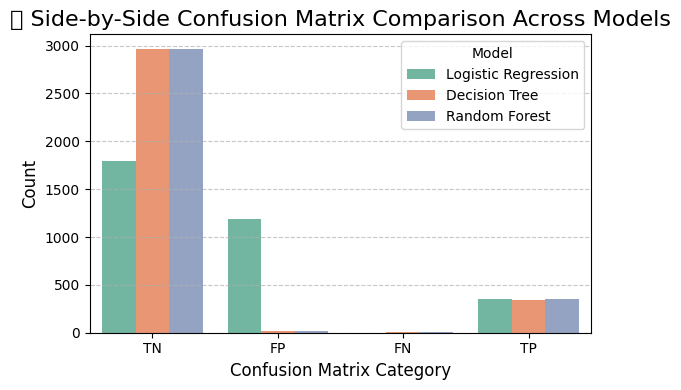

📋 **Model Performance Summary**

              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.642836   0.229826 0.997199  0.373557
      Decision Tree  0.991325   0.953039 0.966387  0.959666
      Random Forest  0.992821   0.953678 0.980392  0.966851


In [137]:
# Function to get model performance & confusion matrix
def get_model_metrics(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    return {
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'TN': tn,
        'FP': fp,
        'FN': fn,
        'TP': tp
    }


# Models predictions dictionary (replace preds accordingly)
models_predictions = {
    'Logistic Regression': lr_pred,
    'Decision Tree': dt_pred,
    'Random Forest': rf_pred
}

# Collect all model metrics
all_results = []
for model_name, preds in models_predictions.items():
    all_results.append(get_model_metrics(y_test, preds, model_name))

# Convert to DataFrame for plotting
results_df = pd.DataFrame(all_results)

# Reshape for side-by-side bar plot
confusion_data = results_df.melt(id_vars=['Model'],
                                 value_vars=['TN', 'FP', 'FN', 'TP'],
                                 var_name='Confusion Category',
                                 value_name='Count')

# Plot side-by-side confusion matrix
plt.figure(figsize=(6, 4))
sns.barplot(x='Confusion Category', y='Count', hue='Model', data=confusion_data, palette='Set2')
plt.title("📊 Side-by-Side Confusion Matrix Comparison Across Models", fontsize=16)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Confusion Matrix Category", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

# Display model performance in table format
performance_df = results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']]
print("📋 **Model Performance Summary**\n")
print(performance_df.to_string(index=False))
